## Importing Libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import collections

ERROR:jax._src.xla_bridge:Jax plugin configuration error: Exception when calling jax_plugins.xla_cuda12.initialize()
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/xla_bridge.py", line 438, in discover_pjrt_plugins
    plugin_module.initialize()
  File "/usr/local/lib/python3.10/dist-packages/jax_plugins/xla_cuda12/__init__.py", line 85, in initialize
    options = xla_client.generate_pjrt_gpu_plugin_options()
AttributeError: module 'jaxlib.xla_client' has no attribute 'generate_pjrt_gpu_plugin_options'


## Exploratory Data Analysis

In [2]:
df = pd.read_csv('network_slicing_dataset.csv')

In [3]:
df.keys()

Index(['Use Case', 'LTE/5g Category', 'Technology Supported', 'Day', 'Time',
       'GBR', 'Packet Loss Rate', 'Packet Delay', 'Slice Type'],
      dtype='object')

In [4]:
df.head()

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet Delay,Slice Type
0,AR/VR/Gaming,16,LTE/5G,thrusday,0,Non-GBR,0.001000,50,eMBB
1,Industry 4.0,18,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC
2,Smartphone,18,LTE/5G,wednesday,20,Non-GBR,0.010000,100,eMBB
3,Smartphone,16,LTE/5G,saturday,10,GBR,0.000001,300,eMBB
4,Smartphone,7,LTE/5G,monday,7,GBR,0.000001,60,eMBB


##### Use Case

<Axes: xlabel='Use Case', ylabel='count'>

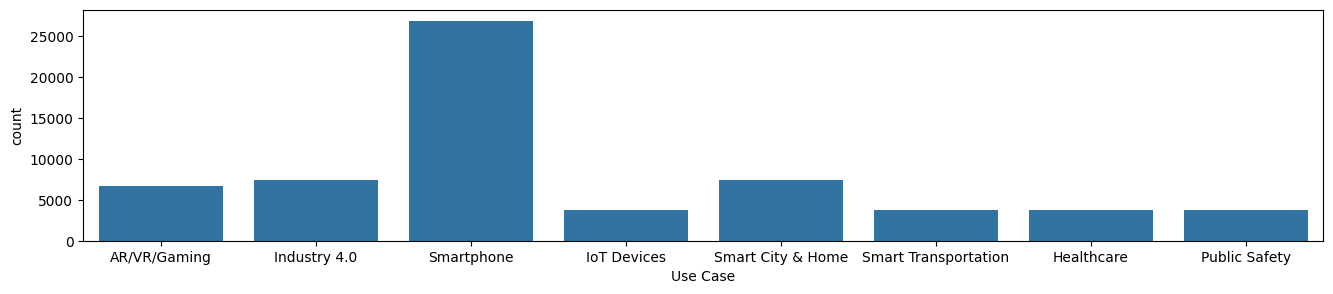

In [5]:
plt.figure(figsize=(16, 3))
sns.countplot(x = 'Use Case',data=df)

##### LTE/5g Category

<Axes: xlabel='LTE/5g Category', ylabel='count'>

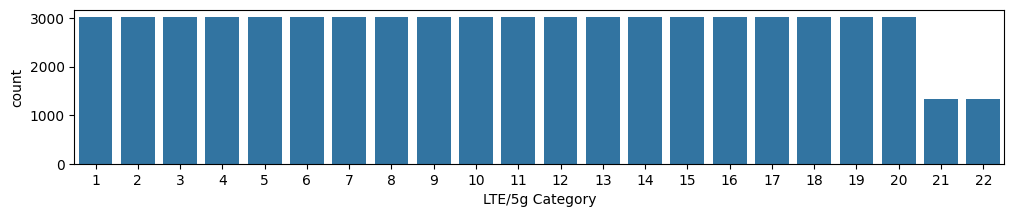

In [6]:
plt.figure(figsize=(12, 2))
sns.countplot(x = 'LTE/5g Category',data=df)

##### Technology Supported

<Axes: xlabel='Technology Supported', ylabel='count'>

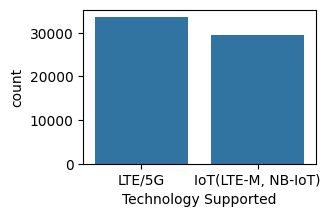

In [7]:
plt.figure(figsize=(3, 2))
sns.countplot(x = 'Technology Supported',data=df)

##### Day

<Axes: xlabel='Day', ylabel='count'>

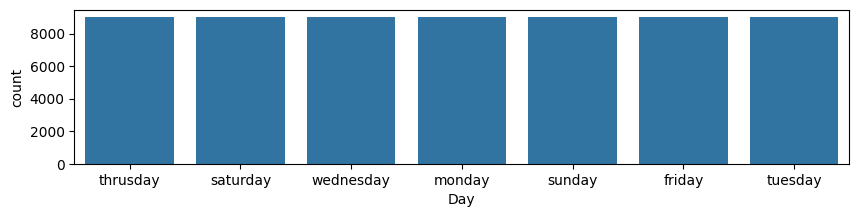

In [8]:
plt.figure(figsize=(10, 2))
sns.countplot(x = 'Day',data=df)

##### Time

<Axes: xlabel='Time', ylabel='count'>

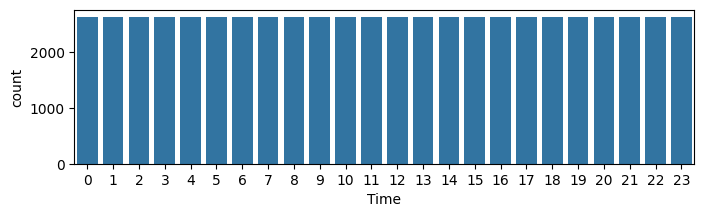

In [9]:
plt.figure(figsize=(8, 2))
sns.countplot(x = 'Time',data=df)

##### GBR

<Axes: xlabel='GBR', ylabel='count'>

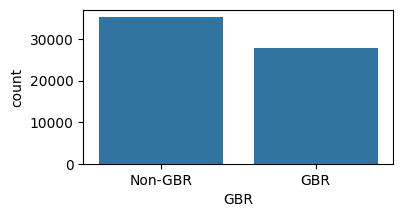

In [10]:
plt.figure(figsize=(4, 2))
sns.countplot(x = 'GBR',data=df)

##### Packet Loss Rate

<Axes: xlabel='Packet Loss Rate', ylabel='count'>

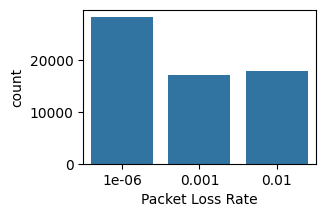

In [11]:
plt.figure(figsize=(3, 2))
sns.countplot(x = 'Packet Loss Rate',data=df)

##### Packet Delay

<Axes: xlabel='Packet Delay', ylabel='count'>

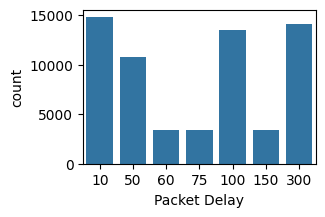

In [12]:
plt.figure(figsize=(3, 2))
sns.countplot(x = 'Packet Delay',data=df)

##### Slice Type

<Axes: xlabel='Slice Type', ylabel='count'>

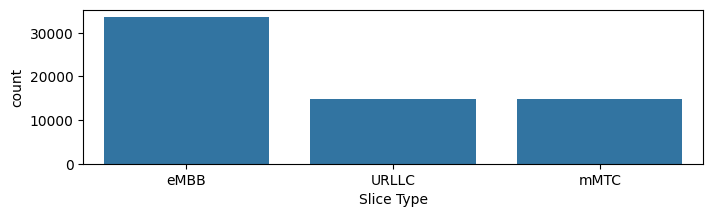

In [13]:
plt.figure(figsize=(8, 2))
sns.countplot(x = 'Slice Type',data=df)

In [14]:
df['Slice Type'].value_counts()

,count
Slice Type,
eMBB,33599
URLLC,14784
mMTC,14784


['Use Case', 'LTE/5g Category', 'Technology Supported', 'Day', 'Time',
       'GBR', 'Packet Loss Rate', 'Packet Delay', 'Slice Type']

### Encoding

In [15]:
df.head()

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet Delay,Slice Type
0,AR/VR/Gaming,16,LTE/5G,thrusday,0,Non-GBR,0.001000,50,eMBB
1,Industry 4.0,18,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC
2,Smartphone,18,LTE/5G,wednesday,20,Non-GBR,0.010000,100,eMBB
3,Smartphone,16,LTE/5G,saturday,10,GBR,0.000001,300,eMBB
4,Smartphone,7,LTE/5G,monday,7,GBR,0.000001,60,eMBB


In [16]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder objects
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()

# Convert all values to strings to ensure uniform data type
df['Use Case'] = df['Use Case'].astype(str)
df['LTE/5g Category'] = df['LTE/5g Category'].astype(str)
df['Technology Supported'] = df['Technology Supported'].astype(str)
df['Day'] = df['Day'].astype(str)
df['Packet Delay'] = df['Packet Delay'].astype(str)

# Apply label encoding to different columns
df['Use Case'] = le1.fit_transform(df['Use Case'].values)
df['LTE/5g Category'] = le2.fit_transform(df['LTE/5g Category'].values)
df['Technology Supported'] = le3.fit_transform(df['Technology Supported'].values)
df['Day'] = le4.fit_transform(df['Day'].values)
df['GBR'] = le5.fit_transform(df['GBR'].values)
df['Packet Delay'] = le6.fit_transform(df['Packet Delay'].values)
df['Slice Type'] = le7.fit_transform(df['Slice Type'].values)

In [17]:
df.head()

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet Delay,Slice Type
0,0,7,1,4,0,1,0.001000,4,1
1,2,9,0,2,22,1,0.000001,0,0
2,7,9,1,6,20,1,0.010000,1,1
3,7,7,1,2,10,0,0.000001,3,1
4,7,19,1,1,7,0,0.000001,5,1


#### Coorealtion Matrix and Feature Importance

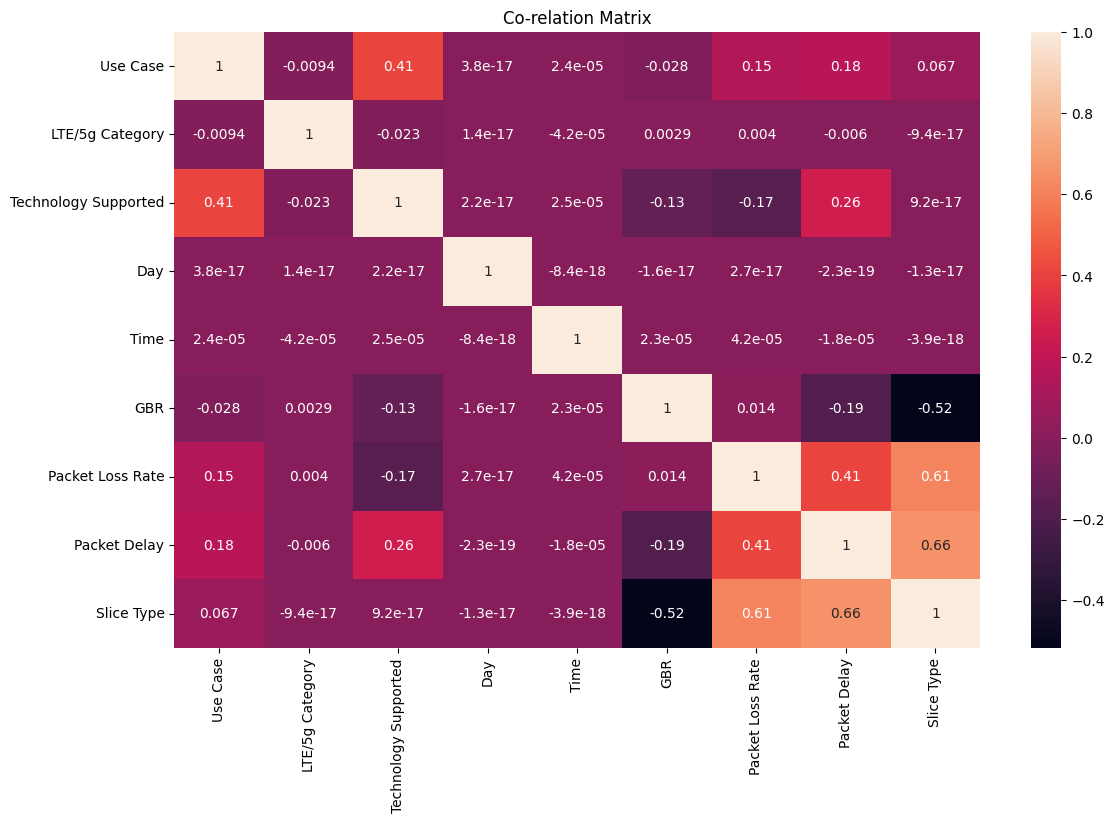

In [18]:
corr_results = df.corr()
fig = plt.figure(figsize = (13,8))
sns.heatmap(corr_results,annot = True)
plt.title('Co-relation Matrix')
plt.show()

## Feature Engineering

In [19]:
# Removing Highly Correlated Features
# ['Use Case', 'LTE/5g Category', 'Technology Supported', 'Day', 'Time', 'GBR', 'Packet Loss Rate', 'Packet Delay', 'Slice Type']
df = df.drop(['Packet Loss Rate', 'Packet Delay'], axis=1)
df.head()

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Slice Type
0,0,7,1,4,0,1,1
1,2,9,0,2,22,1,0
2,7,9,1,6,20,1,1
3,7,7,1,2,10,0,1
4,7,19,1,1,7,0,1


In [20]:
df1 = df # For ANN
df2 = df # For FL

In [21]:
df1.head()

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Slice Type
0,0,7,1,4,0,1,1
1,2,9,0,2,22,1,0
2,7,9,1,6,20,1,1
3,7,7,1,2,10,0,1
4,7,19,1,1,7,0,1


In [22]:
df2.head()

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Slice Type
0,0,7,1,4,0,1,1
1,2,9,0,2,22,1,0
2,7,9,1,6,20,1,1
3,7,7,1,2,10,0,1
4,7,19,1,1,7,0,1


## ANN

In [23]:
# X = df1.iloc[:,:-1].values
# y = df1.iloc[:,-1].values

# from sklearn.preprocessing import LabelEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder


# # Encoding 'Slice Type (Target)'
# encoder = LabelEncoder()
# encoder.fit(y)
# y = encoder.transform(y)


# ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(sparse_output=False), [0])], remainder = 'passthrough')
# y = np.array(ct.fit_transform(y.reshape(-1,1)))

# #%60 for train, %28 for val, %12 for test
# from sklearn.model_selection import train_test_split
# X_train,X_val,Y_train,Y_val = train_test_split(X, y, random_state=42, test_size= 0.4)
# #Split test and val dataset.
# X_val,X_test,Y_val,Y_test = train_test_split(X_val,Y_val,random_state = 43,test_size = 0.3)
# print(f"{X_train.shape}, {X_test.shape}, {X_val.shape}")


# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_val = scaler.transform(X_val)

# # PCA (Dimension Reduction)
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 4)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# X_val = pca.transform(X_val)




# from keras.layers import Conv1D,ConvLSTM1D,Flatten,Dense,BatchNormalization,Dropout
# from keras.models import Sequential
# def build_model():
#     model = Sequential()
#     #Input layer
#     model.add(Dense(8,activation = "relu",kernel_initializer = "he_normal",input_dim = len(X_train[0])))
#     #Hidden layer 1
#     model.add(Dense(16,activation = "relu",kernel_initializer = "he_normal"))
#     model.add(Dropout(0.2))
#     #Hidden layer 2
#     model.add(Dense(32,activation = "relu",kernel_initializer = "he_normal"))
#     model.add(Dropout(0.2))
#     #Hidden layer 3
#     model.add(Dense(16,activation = "relu",kernel_initializer = "he_normal"))
#     #Output layer
#     model.add(Dense(3,activation = "softmax",kernel_initializer = "he_normal"))
#     return model



# model = build_model()
# model.summary()

# model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
#              loss = "categorical_crossentropy",metrics = ["accuracy"])

# history = model.fit(X_train,Y_train,batch_size = 64,epochs = 50,
#                          validation_data=(X_val,Y_val),
#           callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=4))


# fig = plt.figure(figsize = (12,5))

# epochs = len(history.history["accuracy"])
# import matplotlib.pyplot as plt
# plt.subplot(1,2,1)
# plt.title("Train Accuracy and Val Accuracy")
# plt.plot(range(epochs),history.history["accuracy"])
# plt.plot(range(epochs),history.history["val_accuracy"])
# plt.legend(["accuracy","val_accuracy"])

# plt.subplot(1,2,2)
# plt.title("Train Loss and Val Loss")
# plt.plot(range(epochs),history.history["loss"])
# plt.plot(range(epochs),history.history["val_loss"])
# plt.legend(["loss","val_loss"])

# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, average_precision_score

# # Step 1: Evaluate the model on the test dataset
# X_test_reshaped = X_test.reshape(-1, X_test.shape[1])
# loss, accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

# print(f"Model Loss: {loss:.4f}")
# print(f"Model Accuracy: {accuracy:.4f}")

# # Step 2: Generate predictions
# Y_pred = model.predict(X_test_reshaped)
# Y_pred_classes = Y_pred.argmax(axis=1)
# Y_test_classes = Y_test.argmax(axis=1)

# # Step 3: Calculate average precision
# average_precision = average_precision_score(Y_test_classes, Y_pred, average='macro')
# print(f"\nAverage Precision: {average_precision:.4f}")

# # Step 4: Generate a detailed classification report
# report = classification_report(Y_test_classes, Y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2'])
# print("\nClassification Report:\n", report)

## Federated Model

### Dependencies and Setup

In [24]:
#!pip install tensorflow-federated
#!pip install tensorboard

### Importing Necessary Libraries

In [25]:
import tensorflow_federated as tff
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
SEED = 42
tf.random.set_seed(SEED)

## This function call sets the seed for TensorFlow's random number generator.
## By doing this, you ensure that any operation involving randomness in TensorFlow will produce the same results
# every time you run the code, as long as the rest of the code and the environment remain unchanged.
## This includes operations like initializing the weights of a neural network, shuffling datasets, splitting data
# into training and testing sets, and other processes that involve randomness.

### Federated Learning Approach

In [26]:
df2.head()

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Slice Type
0,0,7,1,4,0,1,1
1,2,9,0,2,22,1,0
2,7,9,1,6,20,1,1
3,7,7,1,2,10,0,1
4,7,19,1,1,7,0,1


#### Splitting Data For Clients

In [27]:
client1_df = df2[:len(df.index)//2]
client2_df = df2[len(df.index)//2:]

# `len(df.index)` is commonly used to determine the number of rows in a DataFrame `df`

In [28]:
print(len(df2.index))
print(len(client1_df))
print(len(client2_df))

63167
31583
31584


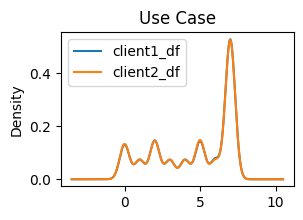

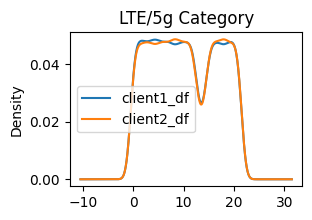

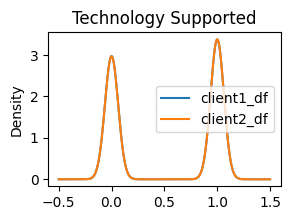

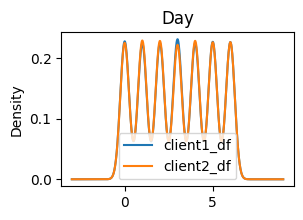

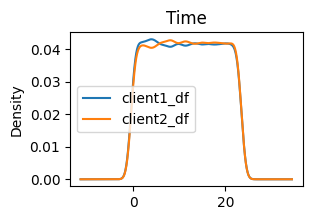

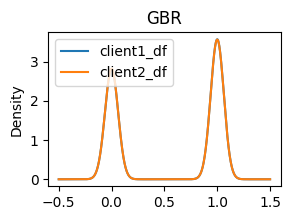

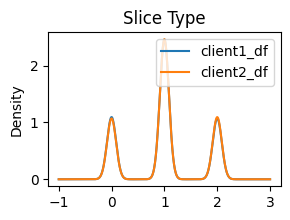

In [29]:
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(SEED)

for col in df.columns:
    # Combine the dataframes of the clients for the specific column, excluding 'Slice Type'
    combined = pd.concat([
        client1_df[col].reset_index(drop=True),
        client2_df[col].reset_index(drop=True)
    ], axis=1, ignore_index=True)

    # Add a small amount of noise to each column to prevent singular covariance matrix
    combined = combined + np.random.normal(0, 1e-6, combined.shape)

    # Create the plot
    fig, ax = plt.subplots(figsize=(3, 2))

    combined.plot(kind='density', ax=ax)

    # Set the title and legend
    ax.set_title(col)
    ax.legend(['client1_df', 'client2_df'])
    plt.show()

#### Building Fedrated Model

In [30]:
EPOCHS = 340
BATCH_SIZE = 64

In [31]:
df2.head()

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Slice Type
0,0,7,1,4,0,1,1
1,2,9,0,2,22,1,0
2,7,9,1,6,20,1,1
3,7,7,1,2,10,0,1
4,7,19,1,1,7,0,1


In [32]:
import tensorflow as tf

def make_tf_dataset(features, labels, batch_size=None):
    # Create a TensorFlow Dataset from the features and labels (both NumPy arrays)
    dataset = tf.data.Dataset.from_tensor_slices((features, labels))

    # Shuffle the dataset
    dataset = dataset.shuffle(200, seed=SEED)

    # Batch the dataset if batch_size is specified
    if batch_size:
        dataset = dataset.batch(batch_size)

    return dataset

In [33]:
def make_tf_dataset(features, labels, batch_size=None):
    # Create a TensorFlow Dataset from the features and labels (both NumPy arrays)
    dataset = tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(features, dtype=tf.float32),
                                                   tf.convert_to_tensor(labels, dtype=tf.float32)))
    # Shuffle the dataset
    dataset = dataset.shuffle(200, seed=SEED)

    # Batch the dataset if batch_size is specified
    if batch_size:
        dataset = dataset.batch(batch_size)

    return dataset

In [34]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np

train_data, val_data = [], []
# Loop over the data for each client (Alice and Bob)
for client_data in [client1_df, client2_df]:
    # Perform train-test split
    train_df, val_df = train_test_split(client_data, test_size=0.3, random_state=SEED)

    # One-hot encode the 'Slice Type' column
    encoder = OneHotEncoder(sparse_output=False)
    train_targets = encoder.fit_transform(train_df[['Slice Type']]).astype(np.int64)
    val_targets = encoder.transform(val_df[['Slice Type']]).astype(np.int64)

    # Drop the original 'Slice Type' column
    train_df = train_df.drop(['Slice Type'], axis=1)
    val_df = val_df.drop(['Slice Type'], axis=1)

    # Scaling (Standardization actually hurts performance)
    scaler = MinMaxScaler()
    train_features = scaler.fit_transform(train_df)
    val_features = scaler.transform(val_df)

    # Apply PCA after scaling
    pca = PCA(n_components=4)
    train_features_pca = pca.fit_transform(train_features)
    val_features_pca = pca.transform(val_features)

    # TF Datasets: pass reshaped features and targets
    train_data.append(make_tf_dataset(train_features_pca, train_targets, batch_size=BATCH_SIZE))
    val_data.append(make_tf_dataset(val_features_pca, val_targets, batch_size=1))

In [35]:
print(train_targets)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 0 1]
 [0 1 0]
 [1 0 0]]


In [36]:
print(val_targets)

[[0 1 0]
 [0 0 1]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [0 1 0]]


In [37]:
print(train_features_pca)

[[ 3.90358744e-01 -4.78626468e-01  4.56631918e-03 -6.52597598e-01]
 [ 7.52121822e-01 -2.19854226e-01  5.16720461e-01  1.97588567e-01]
 [ 7.59316052e-01 -2.15610367e-01  1.82409535e-02  2.24281455e-01]
 ...
 [-3.00235690e-01 -8.08140849e-01  1.56870739e-01 -4.35795358e-02]
 [-9.11572054e-02  4.05693876e-01 -6.52430207e-04 -7.74033039e-01]
 [-7.80075862e-01  6.87029116e-02  1.57540105e-01 -1.07383056e-01]]


In [38]:
print(val_features_pca)

[[ 0.27955528  0.65949188  0.18338385  0.10531158]
 [-0.13879224 -0.68428136 -0.01359281  0.20325695]
 [ 0.38927823 -0.46782542 -0.00502363 -0.76305626]
 ...
 [-0.82785774  0.03774833 -0.34336043 -0.1890491 ]
 [-0.57380282  0.21504586  0.49857034  0.38485819]
 [ 0.76325705 -0.20936715  0.00900665  0.06778577]]


In [39]:
len(train_features_pca[0])

4

In [40]:
train_df.head()

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR
61243,0,17,1,3,22,0
59128,7,17,1,6,16,0
53903,7,19,1,3,17,0
53385,7,3,1,3,2,1
45969,7,2,1,1,10,1


In [41]:
def input_spec():
    return (
        tf.TensorSpec(shape=[None, 4], dtype=tf.float32),  # Features shape
        tf.TensorSpec(shape=[None, 3], dtype=tf.float32)      # Labels shape (one-hot encoded)
    )

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, BatchNormalization, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential
import tensorflow_federated as tff
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
def build_model():
    model = Sequential()

    #Input layer
    model.add(Dense(8,activation = "relu",kernel_initializer = "he_normal",input_dim = 4))

    #Hidden layer 1
    model.add(Dense(16,activation = "relu",kernel_initializer = "he_normal"))
    model.add(Dropout(0.2))

    #Hidden layer 2
    model.add(Dense(32,activation = "relu",kernel_initializer = "he_normal"))
    model.add(Dropout(0.2))

    #Hidden layer 3
    model.add(Dense(16,activation = "relu",kernel_initializer = "he_normal"))

    #Output layer
    model.add(Dense(3,activation = "softmax",kernel_initializer = "he_normal"))
    return model


def model_fn():
    model = build_model()

    return tff.learning.models.from_keras_model(
        model,
        input_spec=input_spec(),  # Replace with actual input_spec implementation
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=[Precision(), Recall(), CategoricalAccuracy()]
    )

In [43]:
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=tff.learning.optimizers.build_adam(learning_rate=0.001),
    server_optimizer_fn=tff.learning.optimizers.build_adam(learning_rate=0.001))

In [44]:
# print(trainer.initialize.type_signature.formatted_representation())

In [45]:
state = trainer.initialize()

In [46]:
result = trainer.next(state, train_data)
train_state = result.state
train_metrics = result.metrics
print('round  1, metrics={}'.format(train_metrics))

round  1, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('precision', 0.8857419), ('recall', 0.78790486), ('categorical_accuracy', 0.85358244), ('loss', 0.3900209), ('num_examples', 44216), ('num_batches', 692)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])


In [47]:
train_hist = []
for i in range(EPOCHS):
    state, metrics = trainer.next(state, train_data)
    train_hist.append(metrics)

    print(f"\rRun {i+1}/{EPOCHS}", end="")

Run 340/340

In [48]:
evaluation_process = tff.learning.algorithms.build_fed_eval(model_fn)

In [49]:
evaluation_state = evaluation_process.initialize()
model_weights = trainer.get_model_weights(state)
evaluation_state = evaluation_process.set_model_weights(evaluation_state, model_weights)

In [50]:
evaluation_output = evaluation_process.next(evaluation_state, val_data)

In [51]:
str(evaluation_output.metrics)

"OrderedDict([('distributor', ()), ('client_work', OrderedDict([('eval', OrderedDict([('current_round_metrics', OrderedDict([('precision', 0.98379946), ('recall', 0.98374754), ('categorical_accuracy', 0.98374754), ('loss', 0.049385883), ('num_examples', 18951), ('num_batches', 18951)])), ('total_rounds_metrics', OrderedDict([('precision', 0.98379946), ('recall', 0.98374754), ('categorical_accuracy', 0.98374754), ('loss', 0.049385883), ('num_examples', 18951), ('num_batches', 18951)]))]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', ())])"

In [52]:
print(f"---Federated model metrics---\n{dict(evaluation_output.metrics['client_work']['eval']['total_rounds_metrics'])}")

---Federated model metrics---
{'precision': 0.98379946, 'recall': 0.98374754, 'categorical_accuracy': 0.98374754, 'loss': 0.049385883, 'num_examples': 18951, 'num_batches': 18951}
